In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [172]:
df = pd.read_pickle('anekdoty_archive.pkl')

In [173]:
df.head()

,rating,text,normalized
0,753,Следующим президентом США будет Буш-святой дух.,следующий президент сша быть буш-святой дух .
1,457,Когда в древнем Риме слишком часто сменялись и...,когда в древний рим слишком часто сменяться им...
2,294,Стаpая бабка становится над паpнем в автобусе ...,стаpий бабка становиться над паpнемой в автобу...
3,266,"Следом за акцией ""Кликни Деда Мороза!"" компани...",следом за акция `` кликнуть дед мороз ! '' ком...
4,222,Встречаются два старых приятеля:- Ба! Какая вс...,встречаться два старое приятель : - ба ! какой...


In [174]:
df.rating = df.rating.astype(int)

In [175]:
df.rating.sort_values(ascending=False).head()

13039     8600
4669      7705
101262    7497
90501     6976
21201     6132
Name: rating, dtype: int64

In [176]:
df["normalized_words"] = df.normalized.apply(lambda x: ' '.join([w if w.isalpha() else 'num' for w in x.split() if w.isalpha() or w.isdigit()]))

In [177]:
df.head()

,rating,text,normalized,normalized_words
0,753,Следующим президентом США будет Буш-святой дух.,следующий президент сша быть буш-святой дух .,следующий президент сша быть дух
1,457,Когда в древнем Риме слишком часто сменялись и...,когда в древний рим слишком часто сменяться им...,когда в древний рим слишком часто сменяться им...
2,294,Стаpая бабка становится над паpнем в автобусе ...,стаpий бабка становиться над паpнемой в автобу...,стаpий бабка становиться над паpнемой в автобу...
3,266,"Следом за акцией ""Кликни Деда Мороза!"" компани...",следом за акция `` кликнуть дед мороз ! '' ком...,следом за акция кликнуть дед мороз компания с ...
4,222,Встречаются два старых приятеля:- Ба! Какая вс...,встречаться два старое приятель : - ба ! какой...,встречаться два старое приятель ба какой встре...


In [178]:
af = pd.DataFrame( df["normalized_words"].copy( ))
af.head()


,normalized_words
0,следующий президент сша быть дух
1,когда в древний рим слишком часто сменяться им...
2,стаpий бабка становиться над паpнемой в автобу...
3,следом за акция кликнуть дед мороз компания с ...
4,встречаться два старое приятель ба какой встре...


In [179]:
af["best"] = df.rating.apply(lambda x: 1 if x > 500 else 0) 
af.index = range(len(af))
af.head()

,normalized_words,best
0,следующий президент сша быть дух,1
1,когда в древний рим слишком часто сменяться им...,0
2,стаpий бабка становиться над паpнемой в автобу...,0
3,следом за акция кликнуть дед мороз компания с ...,0
4,встречаться два старое приятель ба какой встре...,0


In [180]:
af.rating = df.rating.astype(str)
af = af.dropna(axis=1)
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 2 columns):
normalized_words    243713 non-null object
best                243713 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [181]:
af.head()

,normalized_words,best
0,следующий президент сша быть дух,1
1,когда в древний рим слишком часто сменяться им...,0
2,стаpий бабка становиться над паpнемой в автобу...,0
3,следом за акция кликнуть дед мороз компания с ...,0
4,встречаться два старое приятель ба какой встре...,0


In [182]:
af.best.value_counts()

0    236348
1      7365
Name: best, dtype: int64

In [183]:
from sklearn.feature_extraction.text import CountVectorizer

In [184]:
vectorizer = CountVectorizer(max_features=5000)

In [185]:
type(df.normalized_words)

pandas.core.series.Series

In [186]:
af.normalized_words.head()

0                     следующий президент сша быть дух
1    когда в древний рим слишком часто сменяться им...
2    стаpий бабка становиться над паpнемой в автобу...
3    следом за акция кликнуть дед мороз компания с ...
4    встречаться два старое приятель ба какой встре...
Name: normalized_words, dtype: object

In [187]:
%%time
# X = vectorizer.fit_transform(pd.Series(["aaa"])).toarray()
vw = vectorizer.fit_transform(af.normalized_words)

CPU times: user 5.87 s, sys: 172 ms, total: 6.05 s
Wall time: 6.05 s


In [188]:
vw.max

<bound method _minmax_mixin.max of <243713x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 3513746 stored elements in Compressed Sparse Row format>>

In [189]:
X = vw.toarray()

In [190]:
X.max()

169

In [191]:
y = af.best

In [192]:
from collections import Counter

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [199]:
# X_train.value_counts()

In [200]:
y_train.value_counts()

0    189085
1      5885
Name: best, dtype: int64

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
depths = np.arange(2, 15, 2)
#min_samples_leafs = np.arange(1, 10, 2)
grid = {'max_depth': depths}#, 'min_samples_leaf': min_samples_leafs}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='f1', cv=10)

In [204]:
%%time
gridsearch.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

CPU times: user 5h 38min 32s, sys: 19min 29s, total: 5h 58min 2s
Wall time: 6h 5min 22s


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [205]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)[:10]

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.00716, std: 0.00574, params: {'max_depth': 14},
 mean: 0.00590, std: 0.00478, params: {'max_depth': 12},
 mean: 0.00398, std: 0.00439, params: {'max_depth': 10},
 mean: 0.00300, std: 0.00457, params: {'max_depth': 8},
 mean: 0.00202, std: 0.00268, params: {'max_depth': 6},
 mean: 0.00169, std: 0.00226, params: {'max_depth': 4},
 mean: 0.00000, std: 0.00000, params: {'max_depth': 2}]

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


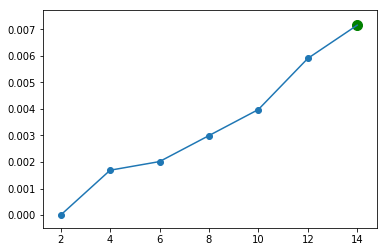

In [206]:
scores = [x.mean_validation_score for x in gridsearch.grid_scores_]# if x.parameters['min_samples_leaf']==1]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmax(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [226]:
clf = DecisionTreeClassifier(max_depth=14)#, min_samples_leaf=10)

In [227]:
%%time
clf.fit(X_train, y_train)

CPU times: user 9min 1s, sys: 7.57 s, total: 9min 9s
Wall time: 9min 12s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [228]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [229]:
from sklearn import metrics

In [230]:
metrics.accuracy_score(y_test, y_pred)

0.96856984592659456

In [231]:
metrics.precision_score(y_test, y_pred)

0.1388888888888889

In [232]:
metrics.recall_score(y_test, y_pred)

0.0067567567567567571

In [233]:
metrics.f1_score(y_test, y_pred)

0.012886597938144333

In [234]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.56536604257601664

In [235]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [236]:
get_tree_dot_view(clf, vectorizer.get_feature_names(), ['best','non best'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="он <= 2.5\ngini = 0.059\nsamples = 194970\nvalue = [189085, 5885]\nclass = best", fillcolor="#e58139f7"] ;
1 [label="вы <= 0.5\ngini = 0.057\nsamples = 191940\nvalue = [186283, 5657]\nclass = best", fillcolor="#e58139f7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="муж <= 0.5\ngini = 0.054\nsamples = 171045\nvalue = [166311, 4734]\nclass = best", fillcolor="#e58139f8"] ;
1 -> 2 ;
3 [label="hу <= 0.5\ngini = 0.052\nsamples = 167397\nvalue = [162896, 4501]\nclass = best", fillcolor="#e58139f8"] ;
2 -> 3 ;
4 [label="вовочка <= 0.5\ngini = 0.052\nsamples = 167342\nvalue = [162856, 4486]\nclass = best", fillcolor="#e58139f8"] ;
3 -> 4 ;
5 [label="домой <= 0.5\ngini = 0.051\nsamples = 166190\nvalue = [161796, 4394]\nclass = best", fillcolor="#e58139f8"] ;
4 -> 5 ;
6 [label="молча <= 0.5\ngini = 0.051\nsamples = 165069\nvalue = [160754, 4315]\nclass = best", fillcolor="#e58139f8"] ;
5 -> 6

In [237]:
def get_top_indexes(s):
    return sorted(range(len(s)), key=lambda k: s[k], reverse=True)

In [238]:
feature_names = vectorizer.get_feature_names()

In [239]:
feature_names

['aka',
 'andrew',
 'apple',
 'fuckov',
 'google',
 'http',
 'hу',
 'ii',
 'in',
 'iphone',
 'iq',
 'ivan',
 'izhstyle',
 'microsoft',
 'num',
 'pussy',
 'sj',
 'sms',
 'the',
 'to',
 'windows',
 'you',
 'абонент',
 'абрам',
 'абсолютно',
 'абхазия',
 'авария',
 'август',
 'австралия',
 'авто',
 'автобус',
 'автоваз',
 'автомат',
 'автоматически',
 'автомобиль',
 'автомобильный',
 'автопром',
 'автор',
 'авторский',
 'ага',
 'агент',
 'агентство',
 'ада',
 'адам',
 'адвокат',
 'админ',
 'администратор',
 'администрация',
 'адрес',
 'аду',
 'аж',
 'азербайджан',
 'азия',
 'аист',
 'ай',
 'айфон',
 'академик',
 'академия',
 'аккуратно',
 'акт',
 'активно',
 'активный',
 'актёр',
 'акула',
 'акция',
 'александр',
 'алексей',
 'алик',
 'алкаш',
 'алкоголизм',
 'алкоголик',
 'алкоголь',
 'алкогольный',
 'алл',
 'аллах',
 'алло',
 'аляска',
 'америка',
 'американец',
 'американский',
 'анализ',
 'анальный',
 'анатолий',
 'ангел',
 'английский',
 'англичанин',
 'англия',
 'андрей',
 'анекдот'

In [240]:
top_indexes = get_top_indexes(clf.feature_importances_)
top_indexes = top_indexes[:10]
top_indexes.reverse()

In [241]:
top_importances = [clf.feature_importances_[i] for i in top_indexes]
top_words = [feature_names[i] for i in top_indexes]

''

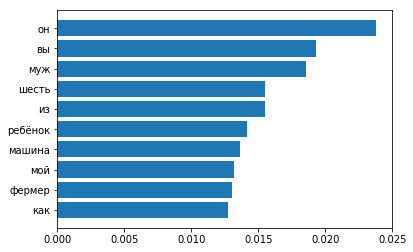

In [242]:
plt.barh(np.arange(len(top_importances)), top_importances)
plt.yticks(np.arange(len(top_words)), top_words)
''

In [224]:
from sklearn.externals import joblib

In [225]:
joblib.dump(clf, 'anekdot_decisiontree.pkl')

['anekdot_decisiontree.pkl']